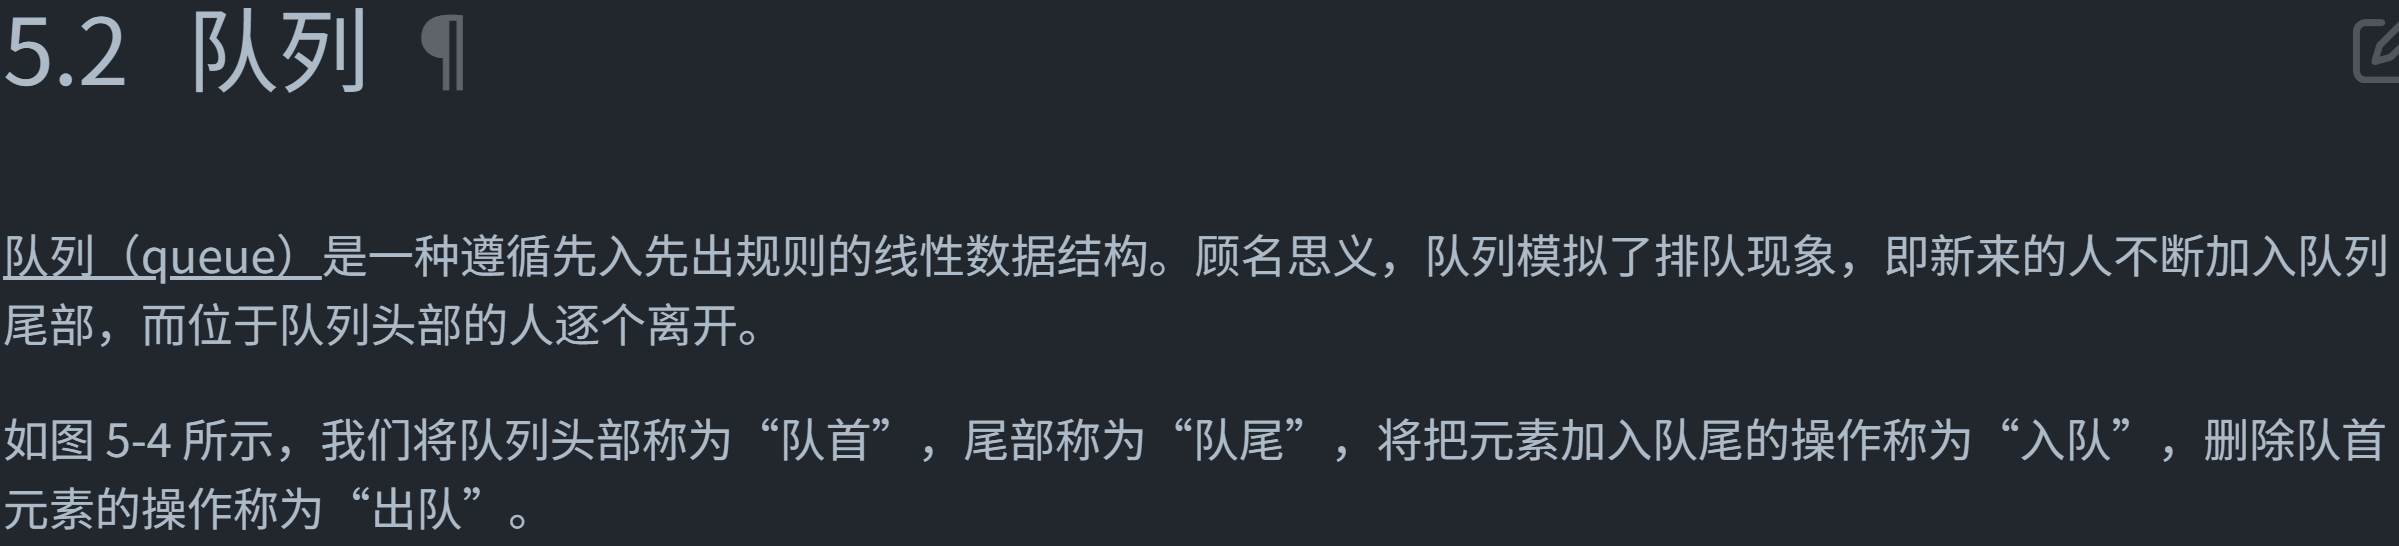

我们可以直接使用编程语言中现成的队列类：

In [ ]:
from collections import deque

# 初始化队列
# 在 Python 中，我们一般将双向队列类 deque 当作队列使用
# 虽然 queue.Queue() 是纯正的队列类，但不太好用，因此不推荐
que: deque[int] = deque()

# 元素入队
que.append(1)
que.append(3)
que.append(2)
que.append(5)
que.append(4)

# 访问队首元素
front: int = que[0]

# 元素出队
pop: int = que.popleft()

# 获取队列长度
size: int = len(que)

# 判断队列是否为空
is_empty: bool = len(que) == 0

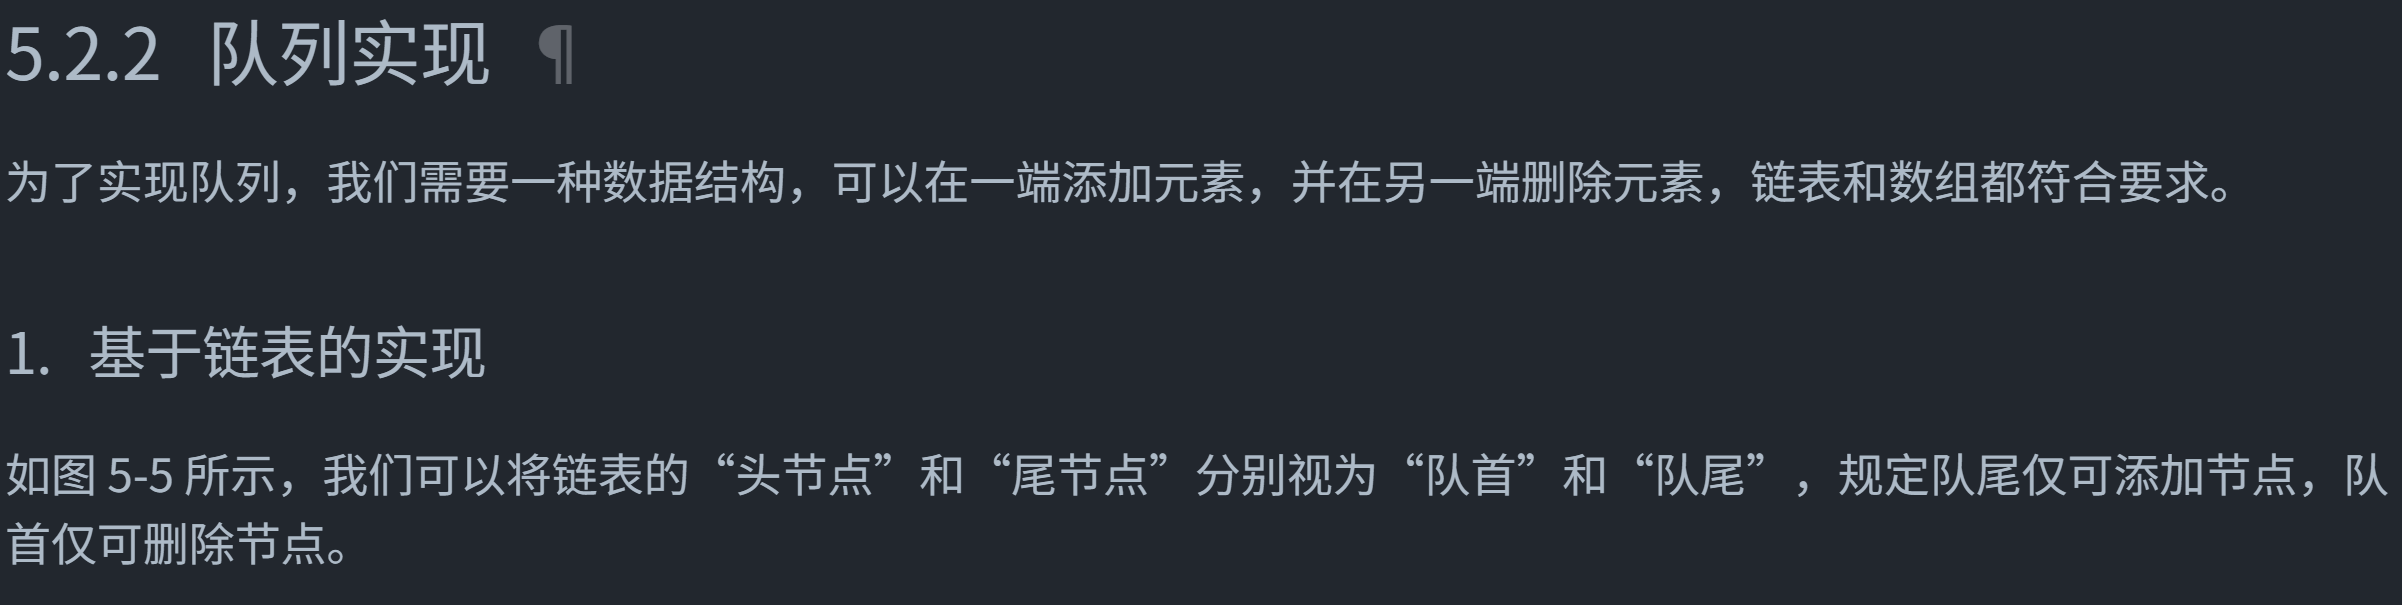

In [ ]:
class ListNode:
    def __init__(self, val) -> None:
        self.val = val
        self.next = ListNode | None

class LinkedListQueue:
    """基于链表实现的队列"""
    def __init__(self):
        self._front: ListNode | None = None # 头节点
        self._rear: ListNode | None = None  # 尾节点
        self._size: int = 0
        
    def size(self) -> int:
        """获取队列长度"""
        return self._size
    
    def is_empty(self) -> bool:
        return self._size == 0
    
    def push(self, num: int):
        # 在尾节点后添加 num
        temp = ListNode(num)
        # 如果队列为空，则令头尾节点都指向该节点
        if self._front is None:
            self._front = temp
            self._rear = temp
        else:
            self._rear.next = temp
            self._rear = temp
        self._size += 1
        
    def peek(self) -> int:
        """访问队首元素"""
        if self.is_empty():
            raise IndexError("队列为空")
        return self._front.val
    
    def pop(self) -> int:
        num = self.peek()
        # 删除头节点
        self._front = self._front.next
        self._size -= 1
        return num
    
    def to_list(self) -> list[int]:
        """转化为列表用于打印"""
        queue = []
        temp = self._front
        while temp:
            queue.append(temp.val)
            temp = temp.next
        return queue


"""Driver Code"""
if __name__ == "__main__":
    # 初始化队列
    queue = LinkedListQueue()

    # 元素入队
    queue.push(1)
    queue.push(3)
    queue.push(2)
    queue.push(5)
    queue.push(4)
    print("队列 queue =", queue.to_list())

    # 访问队首元素
    peek = queue.peek()
    print("队首元素 front =", peek)

    # 元素出队
    pop_front = queue.pop()
    print("出队元素 pop =", pop_front)
    print("出队后 queue =", queue.to_list())

    # 获取队列的长度
    size = queue.size()
    print("队列长度 size =", size)

    # 判断队列是否为空
    is_empty = queue.is_empty()
    print("队列是否为空 =", is_empty)    

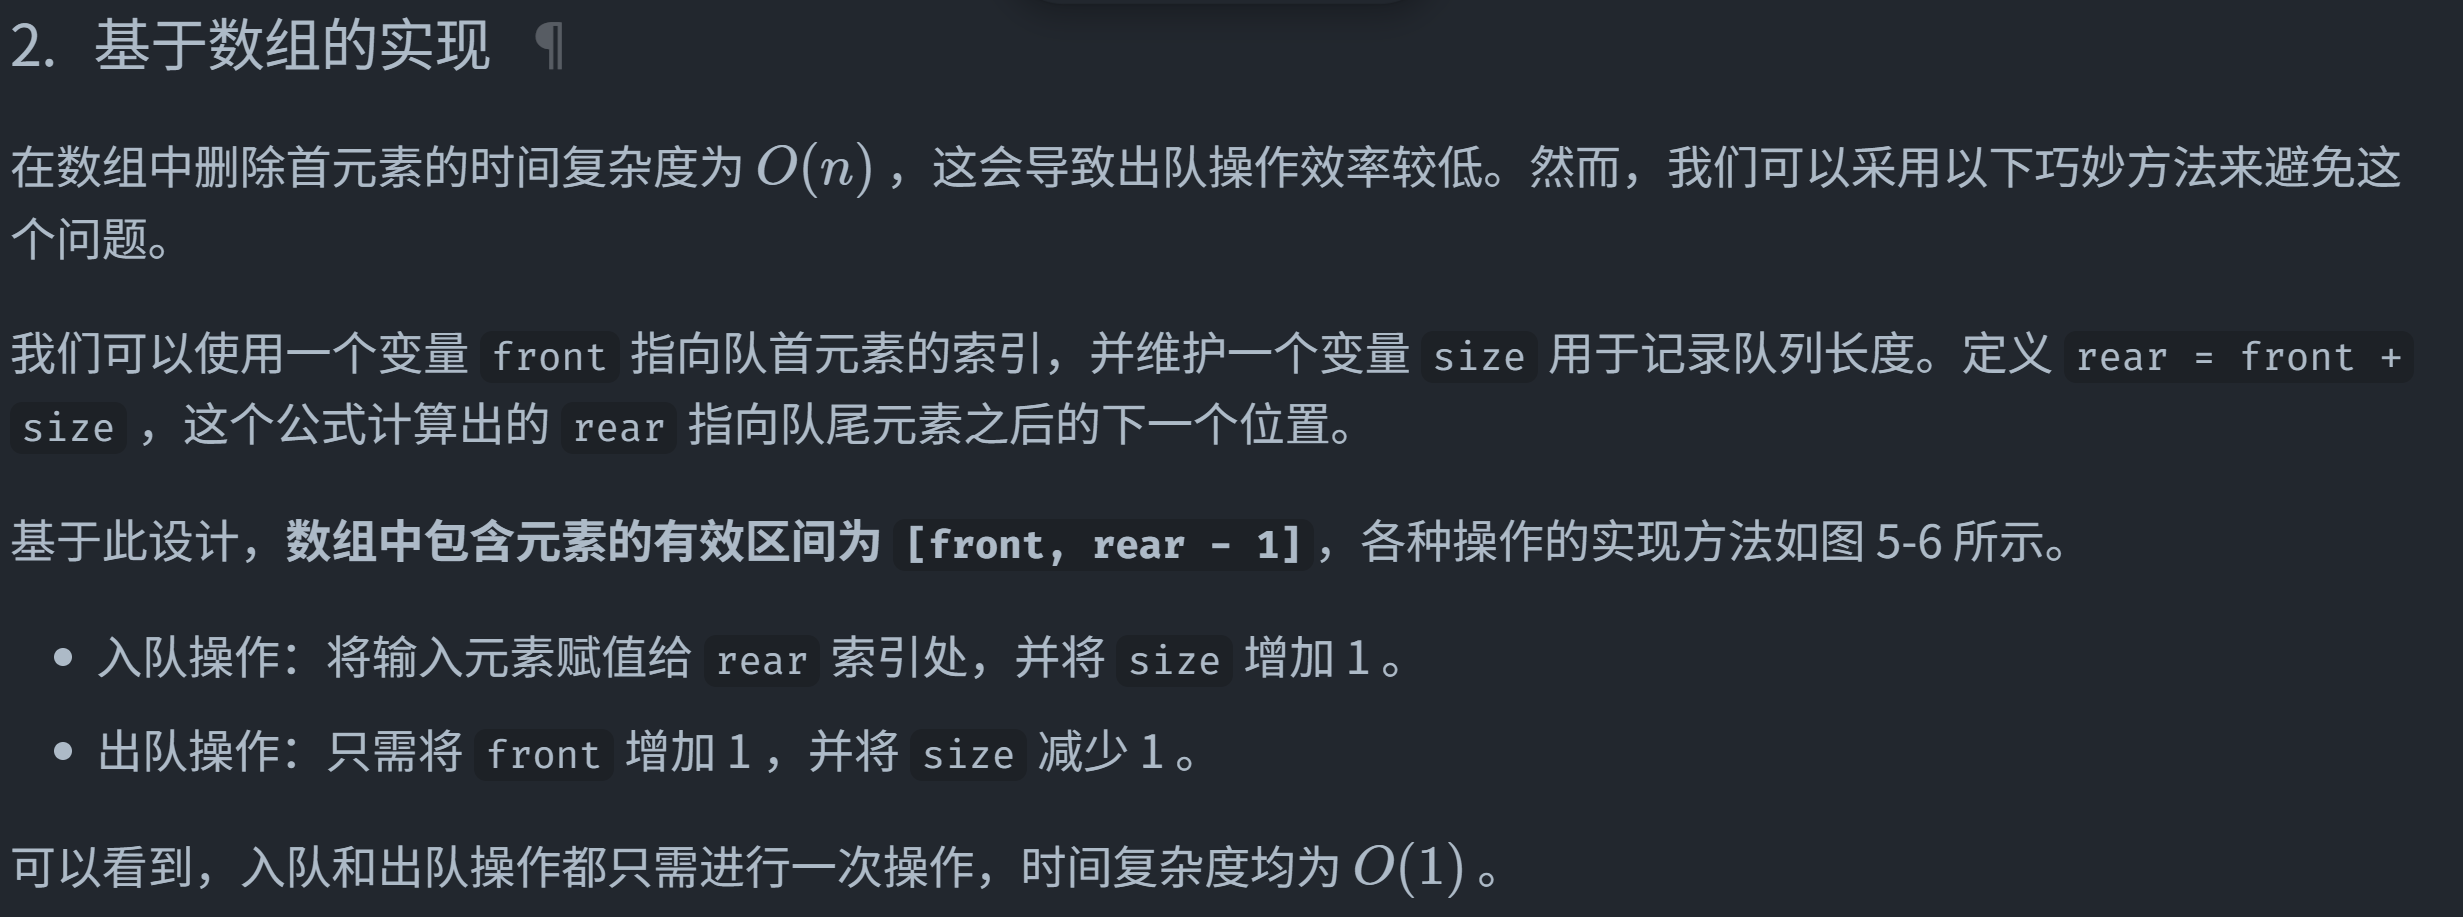

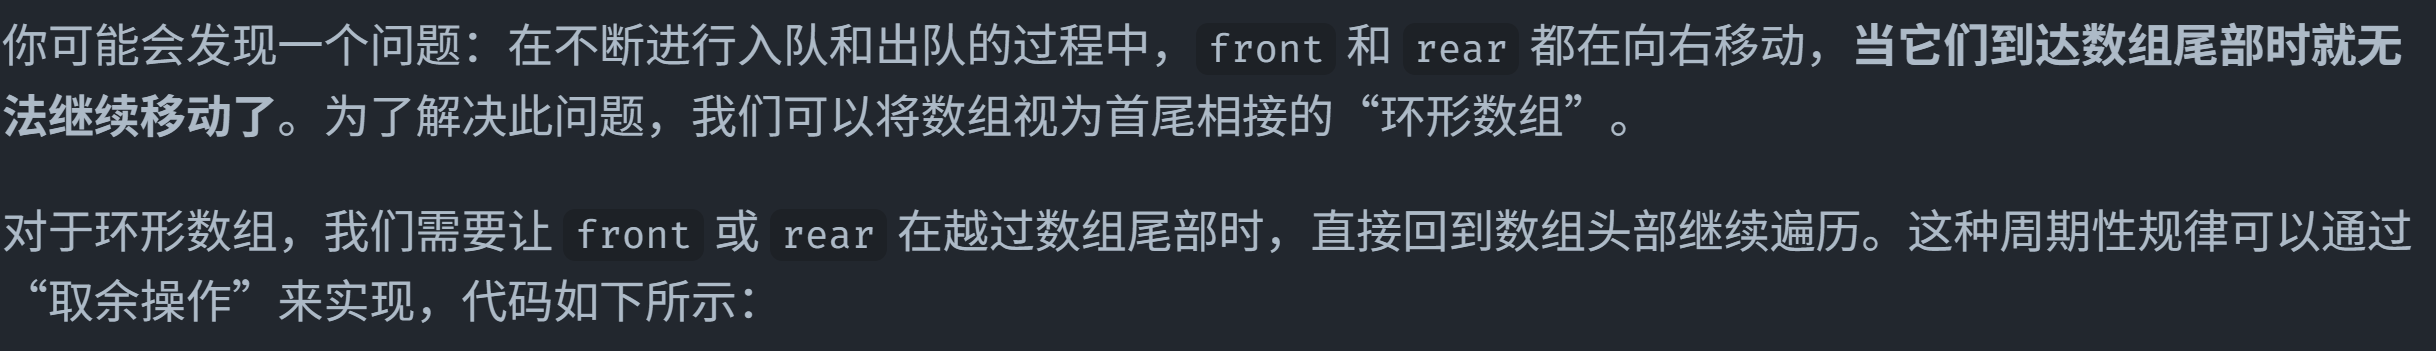

In [9]:
class ArrayQueue:
    """基于环形数组实现的队列"""
    def __init__(self, size: int) -> None:
        """构造方法"""
        self._nums: list[int] = [0] * size 
        self._front: int = 0
        self._size: int = 0
    
    def capacity(self) -> int:
        return len(self._nums)
    
    def size(self) -> int:
        return self._size
    
    def is_empty(self) -> int:
        return self._size == 0
    
    def push(self, num: int):
        if self._size == self.capacity():
            raise IndexError("队列已满")
        # 计算队尾指针，指向队尾索引 + 1
        # 通过取余操作实现 rear 越过数组尾部后回到头部
        rear: int = (self._front + self._size) % self.capacity()
        self._nums[rear] = num
        self._size += 1
    
    def pop(self) -> int:
        num: int = self.peek()
        self._front = (self._front + 1) % self.capacity()
        self._size -= 1
        return num
    
    def peek(self) -> int:
        if self.is_empty():
            raise IndexError("Queue is empty!")
        return self._nums[self._front]
    
    def to_list(self) -> list[int]:
        """返回列表用于打印"""
        res = [0] * self.size()
        j: int = self._front
        for i in range(self.size()):
            res[i] = self._nums[(j % self.capacity())]
            j += 1
        return res


"""Driver Code"""
if __name__ == "__main__":
    # 初始化队列
    queue = ArrayQueue(10)

    # 元素入队
    queue.push(1)
    queue.push(3)
    queue.push(2)
    queue.push(5)
    queue.push(4)
    print("队列: ", queue.to_list())

    # 访问队首元素
    peek = queue.peek()
    print("队首元素 peek =", peek)

    # 元素出队
    pop = queue.pop()
    print("出队元素 pop =", pop)

    # 获取队列的长度
    size = queue.size()
    print("队列长度 size =", size)

    # 判断队列是否为空
    is_empty = queue.is_empty()
    print("队列是否为空 =", is_empty)

队列:  [1, 3, 2, 5, 4]
队首元素 peek = 1
出队元素 pop = 1
队列长度 size = 4
队列是否为空 = False
